<a href="https://colab.research.google.com/github/GoncaloCastroCarneirinho/Keras/blob/main/keras_1_prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Just one hidden layer in Deep Learning models, means that the relationship between inputs and outputs is linear. One hidden layer means we have a just neural network; having two ore more hidden layers means we have a deep neural network.

Every layer nodes are connected to the followers through its one and exclusive weights.

In [ ]:
import tensorflow as tf


importing dataset...

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4664 - accuracy: 0.8674
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1097 - accuracy: 0.9655
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0702 - accuracy: 0.9780


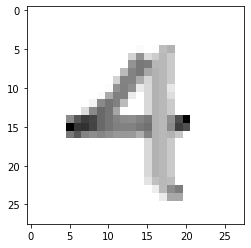

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

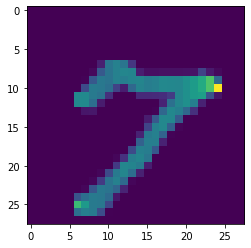

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist #28x28 images of hand-written digits 0-9
                                #MNIST is a Keras dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images

(x_train, y_train), (x_test, y_test) = mnist.load_data() #unpacking dataset to training and testing variables

#We can scale or normalize the image data colors
#This makes easy for network to learn
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

#We can build our model
model = tf.keras.models.Sequential() #######SEQUENTIAL, WHY?????
model.add(tf.keras.layers.Flatten()) #Adding the first layer (input) which is 28x28
#When we flat an image dimensions, is like we are building a vector with (in this case) 28x28 = 784 dimension
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) #128 as the first element of the 'activation' is the number of neurons on the layer
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) #128 as the first element of the 'activation' is the number of neurons on the layer
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) #10 as the first element of the 'activation' is the number of classifications or outputs
                                                                #softmax as probability distributions activation function

#Now, we define the parameters of the model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) #loss is the degree of error
#A neural network does not try to maximize accuracy, they try to minimize the error
#'adam' is the default optimizer

#Now, we train the model
model.fit(x_train, y_train, epochs = 3)

plt.imshow(x_train[34000], cmap = plt.cm.binary) #cmap and cm is color map. Binary means the image will be black & white
plt.show()

print(x_train[0])

#Testing the model and evaluating the loss and the accuracy
val_loss, val_acc = model.evaluate(x_test, y_test) #as in the training model, 'x' is the input (image) and 'y' is the output (corresponding value) 
print(val_loss, val_acc)

#It is fundamental the test model to be less accurate and to have more error than the training model. 
#The testing and training accuracy and error values shall not vary to much.

#Now, we are going to save a model...
model.save('epic_num_reader.model')

#We can reload the model into a new variable...
new_model = tf.keras.models.load_model('epic_num_reader.model')

#If we want to make a prediction of a testing model...
predictions = new_model.predict([x_test])

print(predictions) #I DO NOT UNDERSTAND WHY THIS IS A PROBABILITY TENSOR!!!!!

#Now we can calculate the image number prediction
import numpy as np

print(np.argmax(predictions[9000]))

#Now, we confirm the prediction
plt.imshow(x_test[9000])
plt.show()